In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/productdemand/PoductDemand.csv')

In [3]:
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [4]:
df.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [5]:
df['Total Price'].fillna(df['Total Price'].mean(), inplace=True)

In [6]:
df.head(10)

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
5,9,8091,227.2875,227.2875,18
6,10,8091,327.0375,327.0375,47
7,13,8091,210.9000,210.9000,50
8,14,8091,190.2375,234.4125,82
9,17,8095,99.0375,99.0375,99


In [7]:
df.set_index('ID', inplace=True)

In [8]:
df.describe()

,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150150.000000,150150.000000
mean,9199.422511,206.626751,219.425927,51.674206
std,615.591445,103.308172,110.961712,60.207904
min,8023.000000,41.325000,61.275000,1.000000
25%,8562.000000,130.387500,133.237500,20.000000
50%,9371.000000,198.075000,205.912500,35.000000
75%,9731.000000,233.700000,234.412500,62.000000
max,9984.000000,562.162500,562.162500,2876.000000


In [9]:
import math
df['Total Price'] = df['Total Price'].apply(lambda x: math.floor(x*100)/100)
df['Base Price'] = df['Base Price'].apply(lambda x: math.floor(x*100)/100)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X = df[['Total Price', 'Base Price']]
y = df['Units Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [14]:
print(lr.score(X_test, y_test)*100)

14.030587952437257


In [15]:
import matplotlib.pyplot as plt
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(y_test, y_pred)

0.14030587952437257

In [18]:
import numpy as np
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 30, seed = 123)

# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[09:26:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  46.590045


****We can use multiple models to check which one performs best in the data! Because, XGBoost and LinearRegression did not perform well enough!****

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error as MSE

[09:30:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Linear Regression - RMSE: 56.19, R-squared: 0.14
Decision Tree - RMSE: 48.74, R-squared: 0.35
Random Forest - RMSE: 46.27, R-squared: 0.42
XGBoost - RMSE: 46.07, R-squared: 0.42


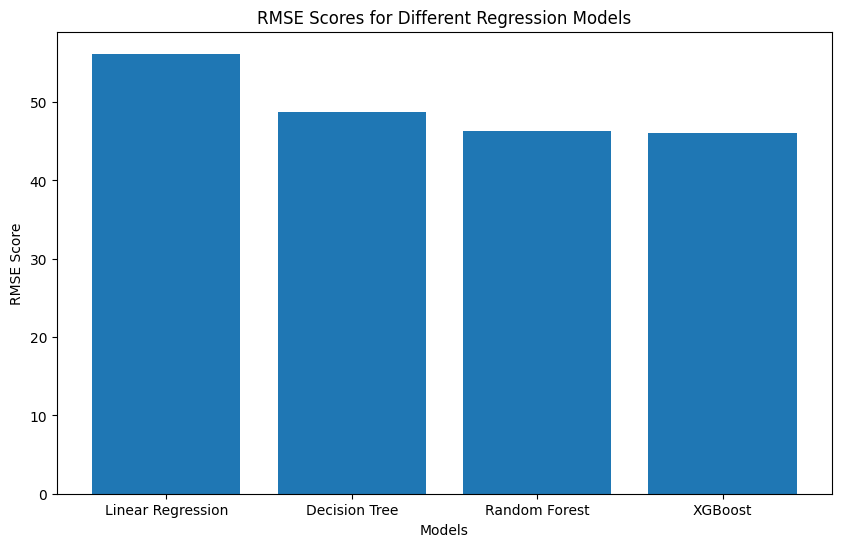

In [22]:
dt_regressor = DecisionTreeRegressor(random_state=123)
dt_regressor.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

# XGBoost Regressor
xgb_r = xg.XGBRegressor(objective='reg:linear', n_estimators=30, seed=123)
xgb_r.fit(X_train, y_train)
xgb_pred = xgb_r.predict(X_test)

# Calculate RMSE and R-squared for each model
models = [lr, dt_regressor, rf_regressor, xgb_r]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"]
rmse_scores = []
r2_scores = []

for model, name in zip(models, model_names):
    pred = model.predict(X_test)
    rmse = np.sqrt(MSE(y_test, pred))
    r2 = r2_score(y_test, pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(f"{name} - RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

# Plot RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores)
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.title("RMSE Scores for Different Regression Models")
plt.show()

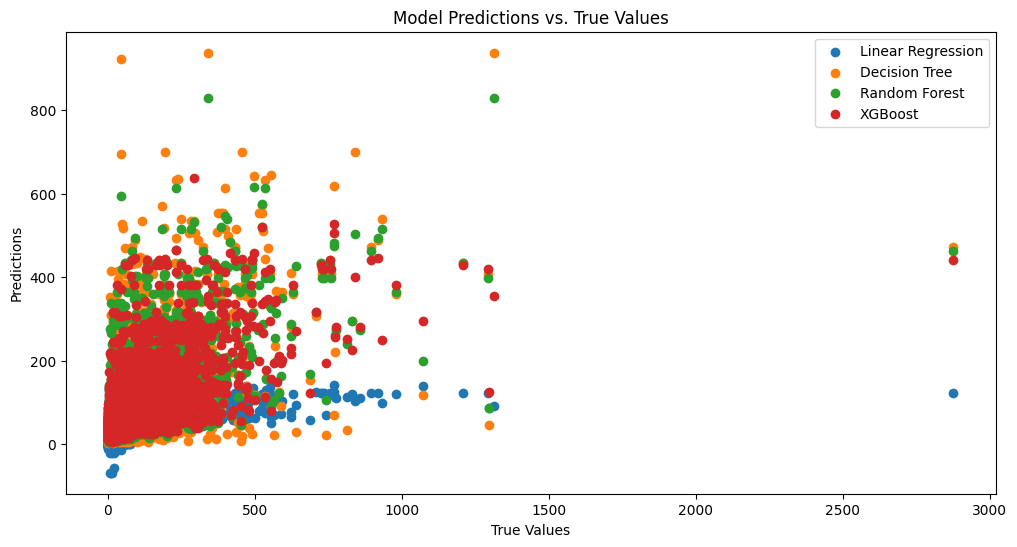

In [21]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label="Linear Regression")
plt.scatter(y_test, dt_pred, label="Decision Tree")
plt.scatter(y_test, rf_pred, label="Random Forest")
plt.scatter(y_test, xgb_pred, label="XGBoost")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.title("Model Predictions vs. True Values")
plt.show()

***From the above plots we can see that, the Random Forest and the decision tree performs well in predicting***